In [1]:
# Setup (Imports)

from LoadData import *

from keras.models import Sequential
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.layers import Dense, LSTM, Dropout, Flatten, Conv1D, BatchNormalization, Activation

import numpy as np

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Setup (Globals/Hyperz)

window_size  = 30
epochs       = 100
batch_size   = 64
emb_size     = 100

In [3]:
# Loading and Splittihttp://localhost:8888/notebooks/HeadlinePredictionClassification.ipynb#ng Data

def get_data(stock):
    
    AllX, AllY = create_timeframed_doc2vec_classification_data(stock, window_size)
    
    trainX, trainY, testX, testY = split_data(AllX, AllY, ratio=.8)
    
    return (trainX, trainY), (testX, testY)


In [4]:
def get_model():
    
    model = Sequential()
    
    model.add(Conv1D(input_shape=(window_size, emb_size),
                     filters=32,
                     kernel_size=4,
                     padding='same'))
    model.add(Dropout(0.5))
    
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    
    model.add(Dense(20))
    model.add(Dropout(0.5))

    model.add(Dense(2, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        
    return model

In [5]:
# Run (Load)

if __name__ == "__main__":

    (trainX, trainY), (testX, testY) = get_data('AAPL')

    print(trainX.shape, trainY.shape)

(536, 30, 100) (536, 2)


Epoch 00000: val_acc improved from -inf to 0.46667, saving model to models\headline-classification.h5
Epoch 00001: val_acc did not improve
Epoch 00002: val_acc did not improve
Epoch 00003: val_acc did not improve
Epoch 00004: val_acc did not improve
Epoch 00005: val_acc did not improve
Epoch 00006: val_acc did not improve
Epoch 00007: val_acc did not improve
Epoch 00008: val_acc did not improve
Epoch 00009: val_acc did not improve
Epoch 00010: val_acc improved from 0.46667 to 0.50370, saving model to models\headline-classification.h5
Epoch 00011: val_acc did not improve
Epoch 00012: val_acc did not improve
Epoch 00013: val_acc did not improve
Epoch 00014: val_acc did not improve
Epoch 00015: val_acc did not improve
Epoch 00016: val_acc did not improve
Epoch 00017: val_acc did not improve
Epoch 00018: val_acc did not improve
Epoch 00019: val_acc did not improve
Epoch 00020: val_acc did not improve
Epoch 00021: val_acc did not improve
Epoch 00022: val_acc did not improve
Epoch 00023: val

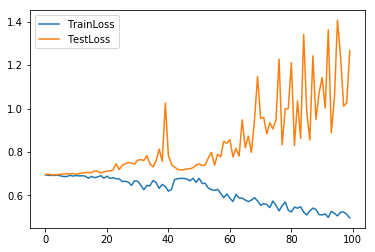

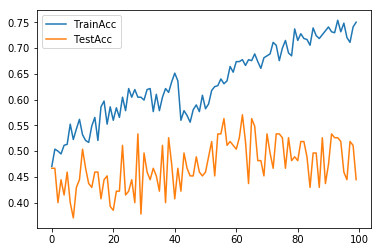

In [6]:
# Run (Train)

if __name__ == "__main__":

    model = get_model()

    reduce_LR = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=30, min_lr=1e-6, verbose=0)
    e_stopping = EarlyStopping(patience=120)
    checkpoint = ModelCheckpoint(os.path.join('models', 'headline-classification.h5'), 
                                 monitor='val_acc', 
                                 verbose=0, 
                                 save_best_only=True)

    history = model.fit(trainX, trainY, epochs=epochs, 
                                        batch_size=batch_size, 
                                        validation_data=(testX, testY), 
                                        verbose=0, 
                                        callbacks=[e_stopping, checkpoint])

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['TrainLoss', 'TestLoss'])
    plt.show()

    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['TrainAcc', 'TestAcc'])
    plt.show()
